In [ ]:
import os
import pandas as pd

# Menelaah Data

## Tampilkan 5 dataset teratas

In [ ]:

df = pd.read_xlsx("dataset.csv")
df.head()


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [ ]:
df.count()

Gender                 1205
Age                    1205
Education Level        1205
Institution Type       1205
IT Student             1205
Location               1205
Load-shedding          1205
Financial Condition    1205
Internet Type          1205
Network Type           1205
Class Duration         1205
Self Lms               1205
Device                 1205
Adaptivity Level       1205
dtype: int64

In [ ]:
df["Adaptivity Level"].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

In [ ]:
df["Adaptivity Level"]

0       1
1       1
2       1
3       1
4       0
       ..
1200    0
1201    1
1202    1
1203    0
1204    1
Name: Adaptivity Level, Length: 1205, dtype: int64

In [ ]:
print("counts of label 'low': {}".format(sum(df["Adaptivity Level"]==0)))
print("counts of label 'moderate': {} \n".format(sum(df["Adaptivity Level"]==1)))
print("counts of label 'high': {}".format(sum(df["Adaptivity Level"]==2)))

counts of label 'low': 480
counts of label 'moderate': 625 

counts of label 'high': 100


## visualisasikan data menggunakan module matplotlib

In [ ]:
import matplotlib.pyplot as plt

class UnderstandingData:

    def __init__(self, raw_df):
        self.raw_df = raw_df
        self.raw_df_grouped = raw_df.groupby("Adaptivity Level")
        self.class_name_low = 'Low'
        self.class_name_moderate = 'Moderate'
        self.class_name_high = 'High'
        self.raw_df_grouped_low = self.raw_df_grouped.get_group(self.class_name_low)
        self.raw_df_grouped_moderate = self.raw_df_grouped.get_group(self.class_name_moderate)
        self.raw_df_grouped_high = self.raw_df_grouped.get_group(self.class_name_high)


    def plot_histogram_categorical(self, key):
        feature_df = pd.DataFrame()
        feature_df["Low"] = self.raw_df_grouped_low[feature_name].value_counts()
        feature_df["Moderate"] = self.raw_df_grouped_moderate[feature_name].value_counts()
        feature_df["High"] = self.raw_df_grouped_high[feature_name].value_counts()

        feature_df.plot(kind='bar')
        plt.title("Feature Bar plot - "+feature_name)
        plt.ylabel("Count")
        plt.xlabel("Feature unique values")
        plt.tight_layout()

In [ ]:
understanding_data = UnderstandingData(df)

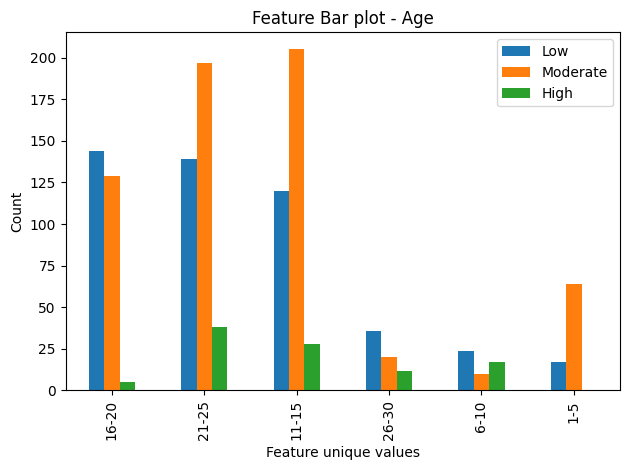

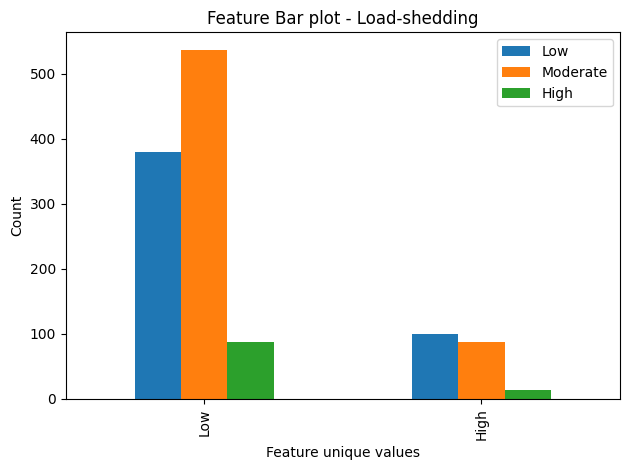

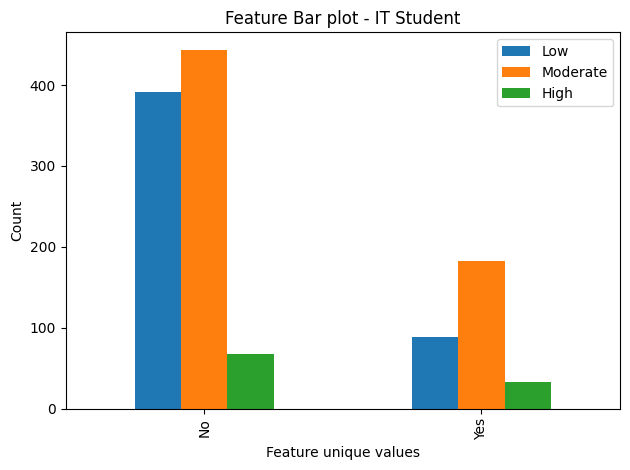

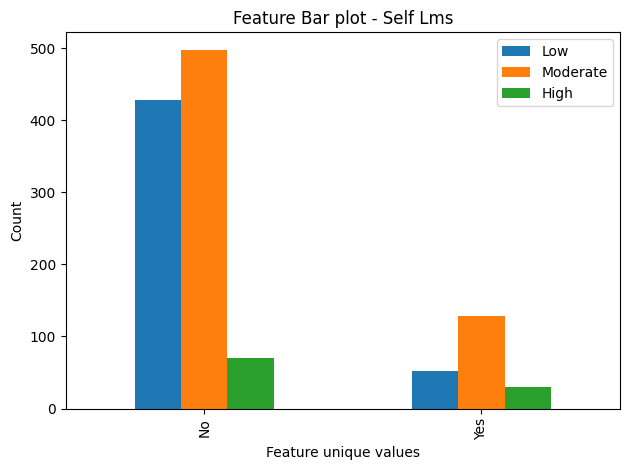

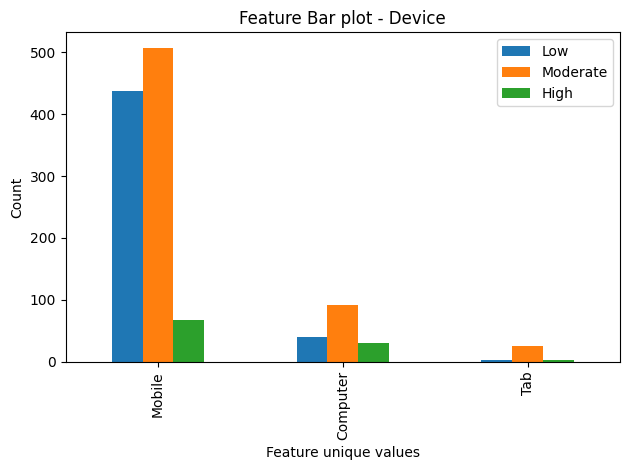

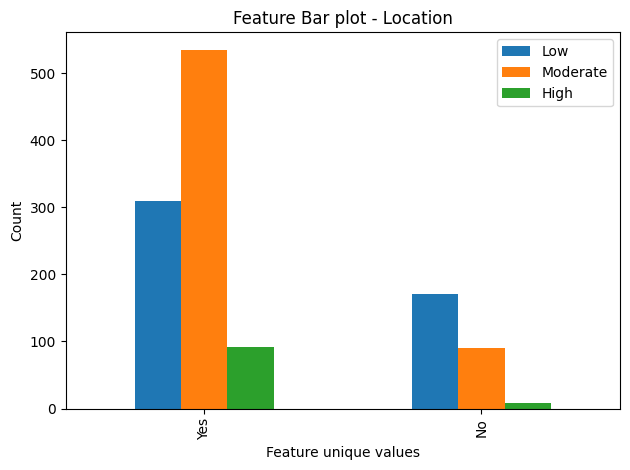

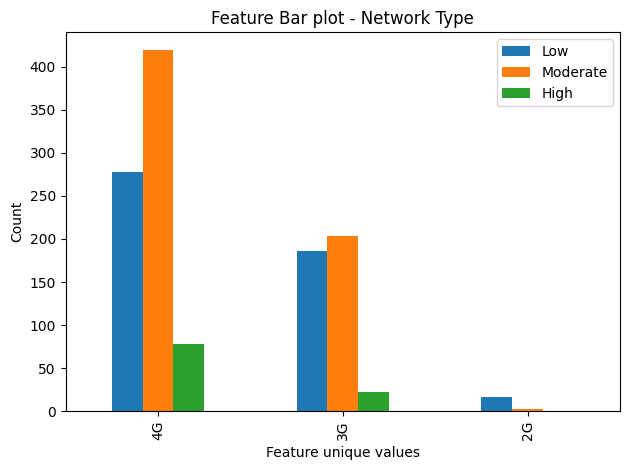

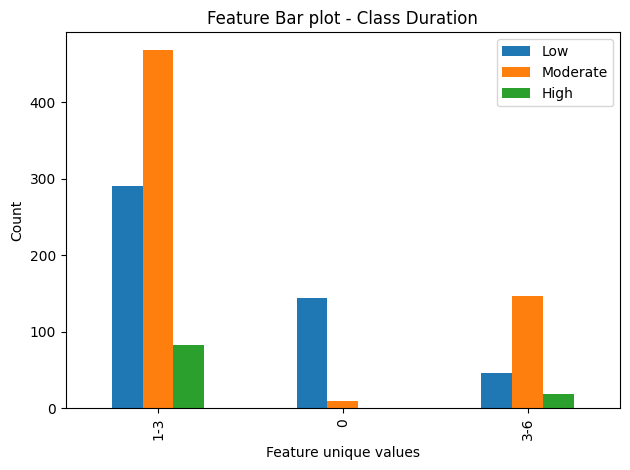

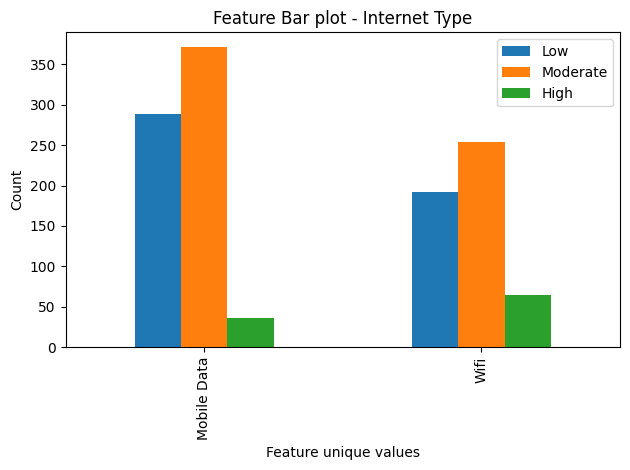

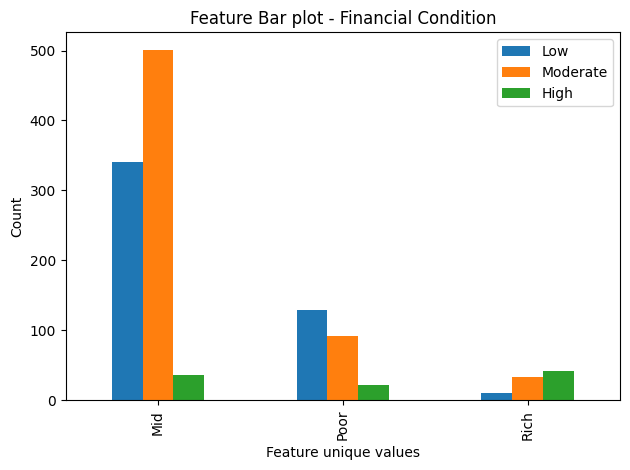

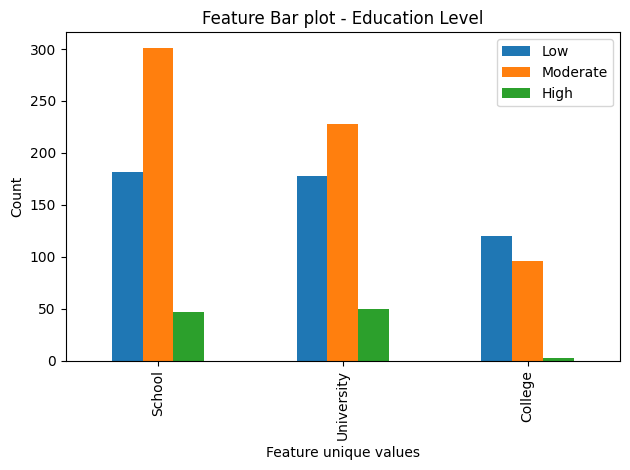

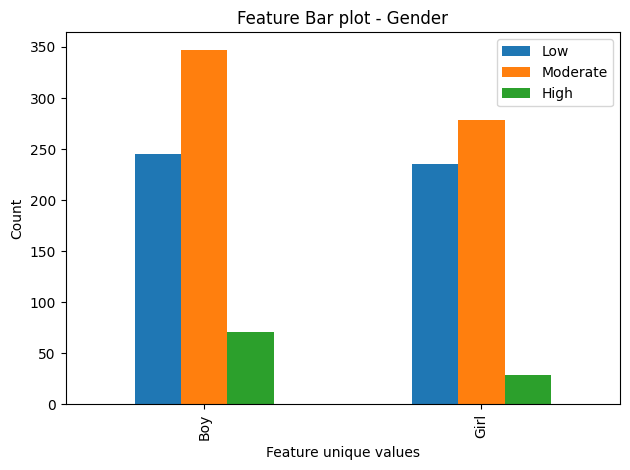

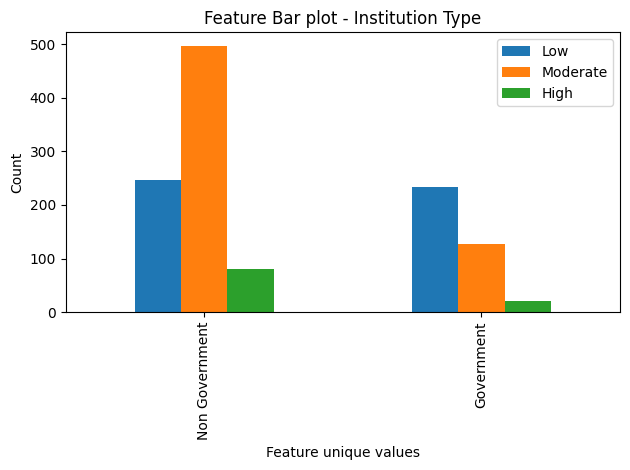

In [ ]:
categorical={"Gender",	"Age",	"Education Level",	"Institution Type",	"IT Student",
             "Location",	"Load-shedding",	"Financial Condition",	"Internet Type",
             "Network Type",	"Class Duration",	"Self Lms","Device"}

for feature_name in categorical:
  understanding_data.plot_histogram_categorical(feature_name)

In [ ]:
df1 = df

In [ ]:
Y = df1['Adaptivity Level']

In [ ]:
Y.unique()

array([1, 0, 2])

In [ ]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_score(X,Y):
    X = X.copy()
    for colname in X.select_dtypes(['object','category']):
        X[colname], _ = X[colname].factorize()

    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_score = mutual_info_regression(X,Y,discrete_features=discrete_features,random_state=0)
    mi_score = pd.Series(mi_score,name='Mutual Information Score',index=X.columns)
    mi_score = mi_score.sort_values(ascending=False)
    return mi_score

In [ ]:
make_mi_score(X,Y)

Class Duration         0.122856
Age                    0.050738
Financial Condition    0.048346
Institution Type       0.039238
Location               0.030794
Device                 0.029386
IT Student             0.022256
Network Type           0.020403
Self Lms               0.019658
Load-shedding          0.012810
Education Level        0.007256
Gender                 0.000000
Internet Type          0.000000
Name: Mutual Information Score, dtype: float64

In [ ]:
print(2**3)

8


# Memvalidasi data

## Tampilkan tipe data untuk setiap kolom

In [ ]:
df.dtypes

Gender                 object
Age                    object
Education Level        object
Institution Type       object
IT Student             object
Location               object
Load-shedding          object
Financial Condition    object
Internet Type          object
Network Type           object
Class Duration         object
Self Lms               object
Device                 object
Adaptivity Level       object
dtype: object

## Lakukan pengecekan feature yang memiliki missing value dalam dataset

In [ ]:
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

#Menentukan objek data

## Buat 2 variabel array X dan Y, isi array X dengan data feature dan array Y dengan data target.

In [ ]:
X = df.copy()
Y = X.pop('Adaptivity Level')

# Membersihkan data

## Lakukan penangangan terhadap missing value yang terdapat pada array X

In [ ]:
#Tidak terdapat missing value pada array X

# Mengkonstruksi data

## Ubah data categorical yang terdapat pada array X dan Y menjadi data numeric

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
cat_cols = ["Gender",	"Age",	"Education Level",	"Institution Type",
            "IT Student",	"Location",	"Load-shedding",	"Financial Condition",
            "Internet Type",	"Network Type",	"Class Duration",	"Self Lms","Device"]

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(X[cat_cols]))
df_encoded.columns = encoder.get_feature_names_out(cat_cols)

# Replace Categotical Data with Encoded Data
df_encoded_ready = X.drop(cat_cols ,axis=1)
df_encoded_ready = pd.concat([df_encoded, df_encoded_ready], axis=1)
X = df_encoded_ready


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df1 = df

In [ ]:
Target = {k: v for k, v in zip(['Low', 'Moderate','High'], list(range(0,3)))}
for i in range(df.shape[0]):
    df1.iloc[i, 3] = Target[df1.iloc[i, 3]]

Y = df1['Adaptivity Level'].astype(int)

In [ ]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,1
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,1
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,1
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,1
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,0


In [ ]:
Y

0       1
1       1
2       1
3       1
4       0
       ..
1200    0
1201    1
1202    1
1203    0
1204    1
Name: Adaptivity Level, Length: 1205, dtype: int64

In [ ]:
X=df_encoded_ready

In [ ]:
X

,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,Education Level_School,...,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1201,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1202,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1203,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


# Membangun skenario model

## Split dataset menjadi 2 yaitu data train dan data test dengan rasio 90 : 10

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

print("Number data X_train dataset: ", X_train.shape)
print("Number data y_train dataset: ", Y_train.shape)
print("Number data X_test dataset: ", X_test.shape)
print("Number data y_test dataset: ", Y_test.shape)

Number data X_train dataset:  (1084, 35)
Number data y_train dataset:  (1084,)
Number data X_test dataset:  (121, 35)
Number data y_test dataset:  (121,)


## Gunakan metode Support Vector Machine (SVM) untuk melatih model

In [ ]:
Y_train.unique()


array([0, 1, 2])

In [ ]:
from sklearn import svm


clf = svm.SVC()
clf.fit(X_train, Y_train)

SVC()

# Mengevaluasi hasil pemodelan

## Lakukan pengujian terhadap model dengan menggunakan data test

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

Y_pred = clf.predict(X_test)


## Tampilkan hasil uji model dengan menggunakan confusion matrix

In [ ]:
import seaborn as sns

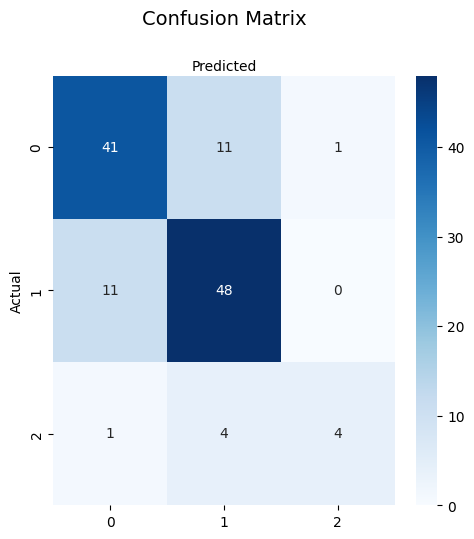

In [ ]:
c_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))

sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="Blues" ,fmt='g',
            xticklabels=['0', '1','2'],
            yticklabels=['0', '1','2'],)
ax1.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1,fontsize=14)
plt.show()

In [ ]:
cnf_matrix

array([[41, 11,  1],
       [11, 48,  0],
       [ 1,  4,  4]])

## Tampilkan nilai akurasi pada data test

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        53
           1       0.76      0.81      0.79        59
           2       0.80      0.44      0.57         9

    accuracy                           0.77       121
   macro avg       0.78      0.68      0.71       121
weighted avg       0.77      0.77      0.77       121



# Melakukan proses review pemodelan

## Lakukan hyperparameter tuning untuk mendapatkan nilai akurasi *terbaik*

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','poly']}

grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.636 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.645 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.631 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.599 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.620 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.931 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.848 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.912 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.926 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.880 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.691 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
Y_pred_grid = grid.predict(X_test)

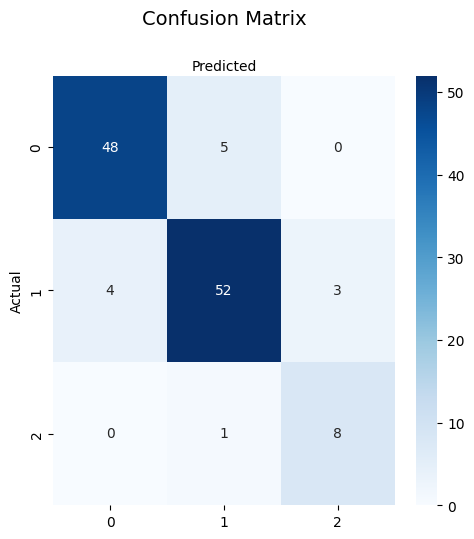

In [ ]:
c_matrix = pd.crosstab(Y_test, Y_pred_grid, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))

sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="Blues" ,fmt='g',
            xticklabels=['0', '1','2'],
            yticklabels=['0', '1','2'],)
ax1.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1,fontsize=14)
plt.show()



In [ ]:
print(classification_report(Y_test,Y_pred_grid))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.90      0.88      0.89        59
           2       0.73      0.89      0.80         9

    accuracy                           0.89       121
   macro avg       0.85      0.89      0.87       121
weighted avg       0.90      0.89      0.89       121



In [ ]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_score(X,Y):
    X = X.copy()
    for colname in X.select_dtypes(['object','category']):
        X[colname], _ = X[colname].factorize()

    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_score = mutual_info_regression(X,Y,discrete_features=discrete_features,random_state=0)
    mi_score = pd.Series(mi_score,name='Mutual Information Score',index=X.columns)
    mi_score = mi_score.sort_values(ascending=False)
    return mi_score

In [ ]:
make_mi_score(X,Y)

Class Duration         0.122856
Age                    0.050738
Financial Condition    0.048346
Institution Type       0.039238
Location               0.030794
Device                 0.029386
IT Student             0.022256
Network Type           0.020403
Self Lms               0.019658
Load-shedding          0.012810
Education Level        0.007256
Gender                 0.000000
Internet Type          0.000000
Name: Mutual Information Score, dtype: float64